# 03 — Exploratory Data Analysis (EDA): Trend Emission ASEAN (2000–2024)
Notebook ini berfokus pada eksplorasi tren emisi karbon negara ASEAN periode 2000–2024.
Tahapan utama:
* memanggil dataset hasil olahan dari folder data/process
* merapikan nama kolom agar lebih mudah dibaca
* membuat pengelompokan waktu per 4 tahun untuk melihat tren secara lebih stabil
* membuat visualisasi tren emisi

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [54]:
url = "https://raw.githubusercontent.com/AlvitoDwiP/carbon-emission/refs/heads/main/data/process/owid_co2_asean_2000_2024.csv"
df = pd.read_csv(url)
df.shape

(250, 79)

Dataset telah sesuai scope ASEAN dan rentang tahun 2000–2024, sehingga siap dipakai untuk eksplorasi tren.

## Column Renaming
Beberapa nama kolom dirapikan agar:
- lebih singkat
- lebih konsisten
- lebih mudah dibaca saat visualisasi dan interpretasi

Rename dilakukan tanpa mengubah makna data.

In [55]:
rename_map = {
    "country": "country",
    "year": "year",
    "population": "population",
    "co2": "co2_total",
    "co2_per_capita": "co2_per_capita",
    "coal_co2": "co2_coal",
    "oil_co2": "co2_oil",
    "gas_co2": "co2_gas",
    "cement_co2": "co2_cement",
    "flaring_co2": "co2_flaring"
}

df = df.rename(columns=rename_map)
df.columns


Index(['country', 'year', 'iso_code', 'population', 'gdp', 'co2_cement',
       'cement_co2_per_capita', 'co2_total', 'co2_growth_abs',
       'co2_growth_prct', 'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'co2_coal',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'co2_flaring', 'flaring_co2_per_capita', 'co2_gas',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use

Nama kolom menjadi lebih jelas, terutama untuk membedakan total emisi dan kontribusi berdasarkan sumber emisi.

Untuk menjaga fokus analisis, kolom yang digunakan dipersempit pada variabel inti yang paling relevan untuk tren emisi.

In [56]:
cols = [
    "country",
    "year",
    "population",
    "co2_total",
    "co2_per_capita",
    "co2_coal",
    "co2_oil",
    "co2_gas",
    "co2_cement",
    "co2_flaring"
]

df_eda = df[cols].copy()
df_eda.shape


(250, 10)

Dataset df_eda berisi variabel inti untuk analisis tren, sehingga visualisasi lebih jelas dan tidak terlalu banyak noise.

### Time Grouping per 4 Years
Pengelompokan waktu per 4 tahun digunakan untuk mengurangi fluktuasi tahunan dan memudahkan pembacaan tren jangka menengah.

In [57]:
df_eda["year_group"] = (df_eda["year"] // 4) * 4
df_eda[["year", "year_group"]].drop_duplicates().sort_values(["year"]).head(12)


,year,year_group
0,2000,2000
1,2001,2000
2,2002,2000
3,2003,2000
4,2004,2004
5,2005,2004
6,2006,2004
7,2007,2004
8,2008,2008
9,2009,2008


Kolom year_group menunjukkan tahun awal dari interval 4 tahunan, misalnya:
- 2000–2003 menjadi 2000
- 2004–2007 menjadi 2004

Agar analisis stabil, agregasi dilakukan per negara dan per kelompok 4 tahun menggunakan nilai rata-rata.

In [58]:
df_4y = (
    df_eda
    .groupby(["country", "year_group"], as_index=False)
    .mean(numeric_only=True)
)

df_4y.shape, df_4y.head()


((70, 11),
   country  year_group    year  population  co2_total  co2_per_capita  \
 0  Brunei        2000  2001.5   336635.00    5.76725        17.13900   
 1  Brunei        2004  2005.5   361851.00    6.65425        18.34925   
 2  Brunei        2008  2009.5   388625.00    8.62075        22.18475   
 3  Brunei        2012  2013.5   413937.25    8.22250        19.89525   
 4  Brunei        2016  2017.5   435214.75    8.96175        20.57575   
 
    co2_coal  co2_oil  co2_gas  co2_cement  co2_flaring  
 0       NaN  1.39600  4.07675         0.0      0.29500  
 1       NaN  1.30275  5.11925         0.0      0.23200  
 2       NaN  1.83925  6.37575         0.0      0.40600  
 3       NaN  1.76400  6.09975         0.0      0.35875  
 4     0.605  2.01150  6.28975         0.0      0.50925  )

Dataset df_4y adalah versi ringkas untuk tren per 4 tahun, cocok untuk visualisasi tren yang lebih halus.

## Trend Plot — Total CO2 Emission (ASEAN)
Visualisasi berikut menampilkan tren total emisi CO2 untuk setiap negara ASEAN berdasarkan interval 4 tahun.

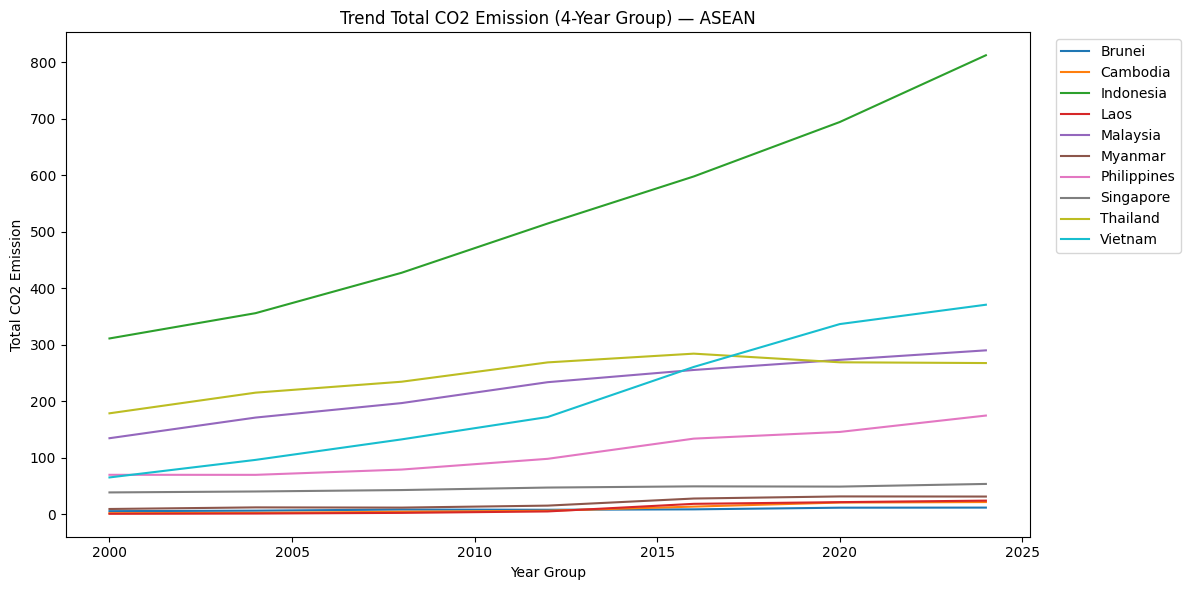

In [59]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_4y, x="year_group", y="co2_total", hue="country")
plt.title("Trend Total CO2 Emission (4-Year Group) — ASEAN")
plt.xlabel("Year Group")
plt.ylabel("Total CO2 Emission")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


Grafik ini membantu melihat pola tren yang lebih stabil dibandingkan data tahunan, sehingga perubahan jangka menengah lebih mudah terlihat.

## Trend Plot — CO2 per Capita (ASEAN)
Total emisi sering dipengaruhi ukuran populasi dan ekonomi.
Grafik ini menampilkan tren emisi per kapita untuk membandingkan intensitas emisi antar negara.

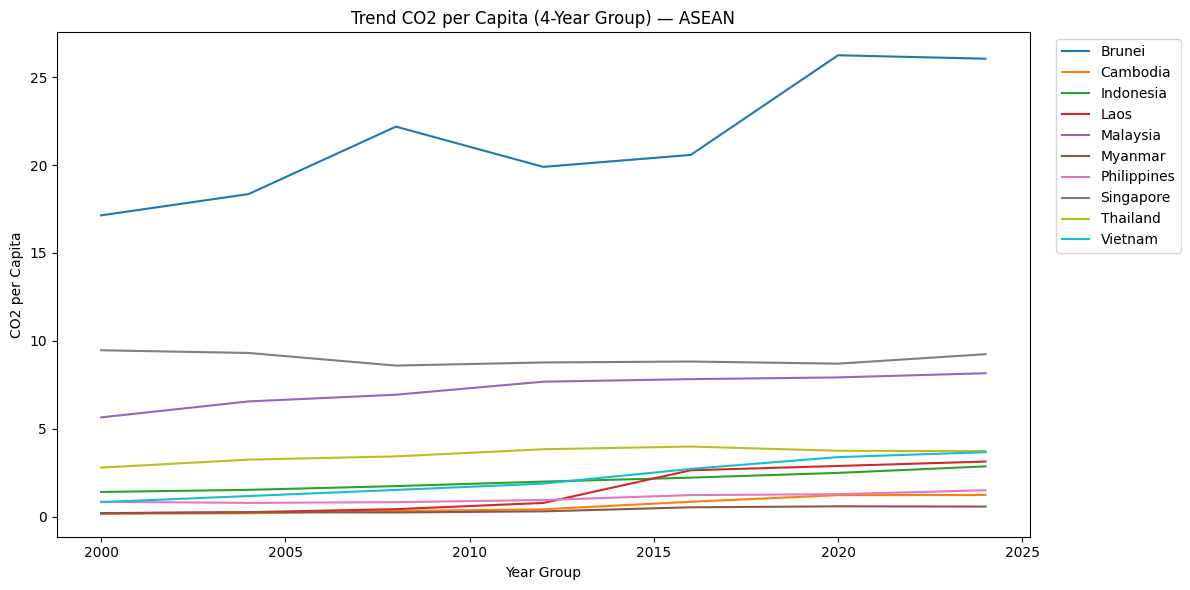

In [60]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_4y, x="year_group", y="co2_per_capita", hue="country")
plt.title("Trend CO2 per Capita (4-Year Group) — ASEAN")
plt.xlabel("Year Group")
plt.ylabel("CO2 per Capita")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


## Data Preparation for Statistical Checks
Analisis statistik (normalitas dan korelasi) akan lebih stabil jika dataset yang dipakai sudah fokus pada kolom numerik yang relevan dan sudah siap untuk pemeriksaan outlier.
Tahap ini menyiapkan dataset khusus untuk:
- handling outlier
- analisis univariat
- analisis bivariat
- uji normalitas
- uji korelasi

In [63]:
cols_stats = [
    "country",
    "year_group",
    "population",
    "co2_total",
    "co2_per_capita",
    "co2_coal",
    "co2_oil",
    "co2_gas",
    "co2_cement",
    "co2_flaring"
]

df_final = df_4y[cols_stats].copy()
df_final.shape


(70, 10)

Dataset df_final berisi kolom identitas dan variabel emisi utama yang dipakai untuk analisis statistik.

### Handling Outlier — Dataset for Numerical Columns
Handling outlier dilakukan pada variabel numerik tertentu agar analisis statistik berikutnya tidak terlalu dipengaruhi oleh nilai ekstrem.
Pada tahap ini, dataset numerik untuk outlier handling dipisahkan terlebih dahulu.

In [64]:
df_final_outlier_handling_done = df_final[
    ["co2_total", "co2_per_capita", "co2_coal", "co2_oil", "co2_gas", "co2_cement", "co2_flaring"]
].copy()

df_final_outlier_handling_done.shape


(70, 7)